In [1]:
import requests
from dotenv import load_dotenv
import yfinance as yf
import hvplot.pandas
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np
import seaborn as sns
import panel as pn
import plotly.express as px
import matplotlib.pyplot as plt
from pathlib import Path
import panel.widgets as pnw

In [2]:
load_dotenv()

True

In [3]:
ticker_list = ['^GSPC','^IXIC','MSCI','ETH-USD','BCH-USD','BTC-USD','ADA-USD','DASH-USD','LTC-USD']

In [4]:
def tickerListGrab(ticker_list, period="5y"):
    #create empty DataFrame
    df_price = pd.DataFrame()
    df_return = pd.DataFrame()
    #loop through list
    for ticker in ticker_list:
        out = [0]
        # get data from Yahoo Finance
        symbol = yf.Ticker(ticker)
        symbol_hist = symbol.history(period=period)
        # drop unnecessary columns
        symbol_hist = symbol_hist.drop(["Dividends","Stock Splits"],axis = 1)
        # drop NA
        symbol_hist = symbol_hist.dropna()
        # sort data by Date(ascending)
        symbol_hist = symbol_hist.sort_index(ascending=True)
        # calculate return for each symbol
        for i in range(len(symbol_hist)-1):
            out.append((symbol_hist['Close'][i+1]-symbol_hist['Close'][i])/symbol_hist['Close'][i])
        symbol_hist['Return'] = out
        # labeling
#        symbol_hist['Name'] = ticker
        # append to the main DataFrame
        df_price = pd.concat([df_price,symbol_hist['Close']],axis=1)
        df_return = pd.concat([df_return,symbol_hist['Return']],axis=1)
        df_price = df_price.rename(columns={'Close':ticker+'_Close'})
        df_return = df_return.rename(columns={'Return':ticker+'_Return'})
        #df_price = df_price.sort_index(ascending=False)
        #df_return = df_return.sort_index(ascending=False)
#        symbol_hist.to_csv(f"{ticker}_hist.csv")
        # dropna
    df_price = df_price.dropna()
    df_return = df_return.dropna()
    return df_price,df_return

In [5]:
df_price,df_return = tickerListGrab(ticker_list)

In [6]:
df_price.tail()

^GSPC_Close   ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
2021-05-25 00:00:00  4188.129883  13657.169922  464.609985    2706.628906   
2021-05-26 00:00:00  4195.990234  13738.000000  465.100006    2888.698730   
2021-05-27 00:00:00  4200.879883  13736.280273  464.369995    2736.488525   
2021-05-28 00:00:00  4204.109863  13748.740234  468.130005    2419.906250   
2021-06-01 00:00:00  4202.040039  13736.480469  461.970001    2633.518311   

                     BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  \
2021-05-25 00:00:00     719.947815   38402.222656       1.555369   
2021-05-26 00:00:00     765.048828   39294.199219       1.782702   
2021-05-27 00:00:00     745.955078   38436.968750       1.645960   
2021-05-28 00:00:00     689.947876   35697.605469       1.511987   
2021-06-01 00:00:00     691.403870   36684.925781       1.734753   

                     DASH-USD_Close  LTC-USD_Close  
2021-05-25 00:00:00      195.235168     183.497894  
2021-05-26 00:00:00      214.202271     199.224335  
2021-05-27 00:00:00      203.325684     193.121094  
2021-05-28 00:00:00      183.186523     177.320663  
2021-06-01 00:00:00      191.512054     182.980698

In [7]:
df_price.head()

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
2017-10-02 00:00:00  2529.120117  6516.720215  112.523842     297.475006   
2017-10-03 00:00:00  2534.580078  6531.709961  113.995552     292.463013   
2017-10-04 00:00:00  2537.739990  6534.629883  115.563446     292.657990   
2017-10-05 00:00:00  2552.070068  6585.359863  116.486870     295.863007   
2017-10-06 00:00:00  2549.330078  6590.180176  116.660034     308.588013   

                     BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  \
2017-10-02 00:00:00     421.186005    4409.319824       0.025932   
2017-10-03 00:00:00     404.177002    4317.479980       0.020816   
2017-10-04 00:00:00     358.446991    4229.359863       0.021931   
2017-10-05 00:00:00     355.750000    4328.410156       0.021489   
2017-10-06 00:00:00     363.014008    4370.810059       0.018539   

                     DASH-USD_Close  LTC-USD_Close  
2017-10-02 00:00:00      308.684998      53.375999  
2017-10-03 00:00:00      296.234985      52.349602  
2017-10-04 00:00:00      305.457001      51.399502  
2017-10-05 00:00:00      305.398987      51.669498  
2017-10-06 00:00:00      306.878998      52.120098

In [8]:
df_return.head()

^GSPC_Return  ^IXIC_Return  MSCI_Return  ETH-USD_Return  \
2017-10-02 00:00:00      0.003874      0.003196     0.000685       -0.016081   
2017-10-03 00:00:00      0.002159      0.002300     0.013079       -0.016848   
2017-10-04 00:00:00      0.001247      0.000447     0.013754        0.000667   
2017-10-05 00:00:00      0.005647      0.007763     0.007991        0.010951   
2017-10-06 00:00:00     -0.001074      0.000732     0.001487        0.043010   

                     BCH-USD_Return  BTC-USD_Return  ADA-USD_Return  \
2017-10-02 00:00:00        0.014534        0.001267        0.038568   
2017-10-03 00:00:00       -0.040384       -0.020829       -0.197285   
2017-10-04 00:00:00       -0.113144       -0.020410        0.053565   
2017-10-05 00:00:00       -0.007524        0.023420       -0.020154   
2017-10-06 00:00:00        0.020419        0.009796       -0.137280   

                     DASH-USD_Return  LTC-USD_Return  
2017-10-02 00:00:00        -0.022536       -0.021401  
2017-10-03 00:00:00        -0.040332       -0.019230  
2017-10-04 00:00:00         0.031131       -0.018149  
2017-10-05 00:00:00        -0.000190        0.005253  
2017-10-06 00:00:00         0.004846        0.008721

In [9]:
df_price.hvplot.line(title = 'Index and Crypto Price')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [10]:
df_return.hvplot.line(title = 'Index and Crypto Return')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

<AxesSubplot:>

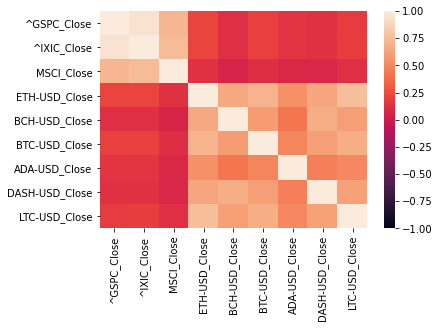

In [11]:
heat = df_price.pct_change().corr()
sns.heatmap(heat, vmin=-1, vmax=1)

<AxesSubplot:>

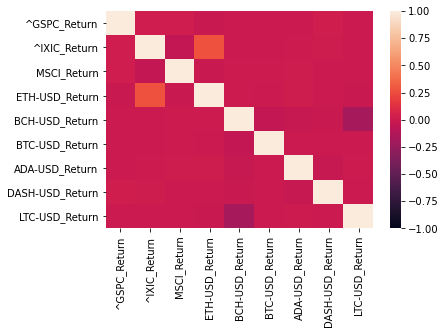

In [12]:
heat = df_return.pct_change().corr()
sns.heatmap(heat, vmin=-1, vmax=1)

In [13]:
annual_returns = df_price.pct_change().mean()*252
annual_returns

^GSPC_Close       0.163249
^IXIC_Close       0.234708
MSCI_Close        0.449968
ETH-USD_Close     1.123542
BCH-USD_Close     1.018333
BTC-USD_Close     0.896695
ADA-USD_Close     2.356503
DASH-USD_Close    0.533764
LTC-USD_Close     0.930328
dtype: float64

<AxesSubplot:>

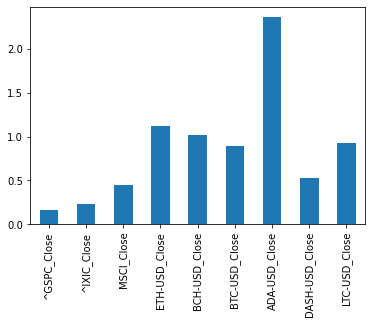

In [14]:
annual_returns.plot(kind = 'bar')

In [15]:
daily_returns = df_price.pct_change()

In [16]:
#rolling volatility 
##crypto looks like a roller-coaster.

daily_returns.rolling(200).std() * np.sqrt(200)
daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [17]:
daily_returns.head()

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
2017-10-02 00:00:00          NaN          NaN         NaN            NaN   
2017-10-03 00:00:00     0.002159     0.002300    0.013079      -0.016848   
2017-10-04 00:00:00     0.001247     0.000447    0.013754       0.000667   
2017-10-05 00:00:00     0.005647     0.007763    0.007991       0.010951   
2017-10-06 00:00:00    -0.001074     0.000732    0.001487       0.043010   

                     BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  \
2017-10-02 00:00:00            NaN            NaN            NaN   
2017-10-03 00:00:00      -0.040384      -0.020829      -0.197285   
2017-10-04 00:00:00      -0.113144      -0.020410       0.053565   
2017-10-05 00:00:00      -0.007524       0.023420      -0.020154   
2017-10-06 00:00:00       0.020419       0.009796      -0.137280   

                     DASH-USD_Close  LTC-USD_Close  
2017-10-02 00:00:00             NaN            NaN  
2017-10-03 00:00:00       -0.040332      -0.019230  
2017-10-04 00:00:00        0.031131      -0.018149  
2017-10-05 00:00:00       -0.000190       0.005253  
2017-10-06 00:00:00        0.004846       0.008721

In [18]:
name = pnw.MultiSelect(options=list(daily_returns.columns.values))
ax = daily_returns.hvplot.hist(y=name,bins=75,alpha=0.6,bin_range=(-0.3, 0.3),ylim=(0,800))
pn.Row(pn.WidgetBox(name), ax)

#We can plot out the price returns on a histogram chart. The wider the distribution the more volatile it is. 
#You can see that sp500 is mostly within the mean distribution. But cardano spreads widely across the x-axis. Sometimes 
#the returns can be 10%,15% or 20%. But you will never see a day sp500 up 15%.

Row
    [0] WidgetBox
        [0] MultiSelect(options=['^GSPC_Close', ...])
    [1] ParamFunction(function)

<AxesSubplot:>

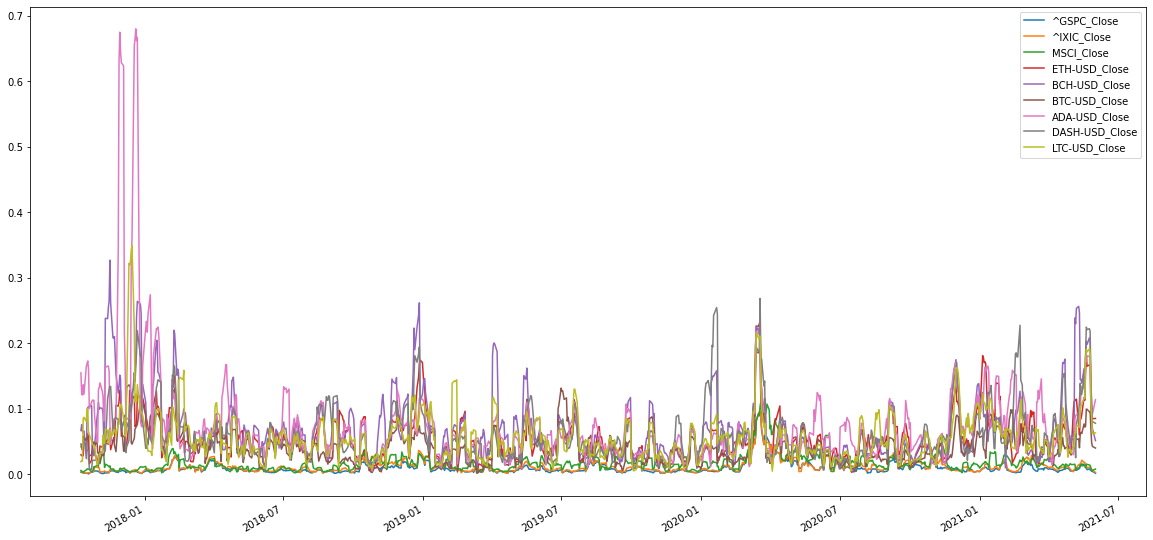

In [19]:
daily_returns.rolling(5).std().plot(figsize=(20,10))
#Add sliding variable? (Days)

### Covariance

Covariance tells us the relationship between the variables. We are trying to find if there is a linear relationship between assets.

For example, if bitcoin gains 5%, how do the returns of sp500 correspond to it? Does it also gain 5%? Or does it show no response to it? That is one way to think about covariance. Let’s see their annual 

In [20]:
annual_cov = daily_returns.cov() * 252
annual_cov

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
^GSPC_Close        0.047077     0.049988    0.055363       0.049206   
^IXIC_Close        0.049988     0.059039    0.063479       0.055471   
MSCI_Close         0.055363     0.063479    0.123576       0.050227   
ETH-USD_Close      0.049206     0.055471    0.050227       1.040680   
BCH-USD_Close      0.038109     0.041210    0.032987       0.907656   
BTC-USD_Close      0.033394     0.038605    0.033606       0.567709   
ADA-USD_Close      0.057687     0.064712    0.053824       0.970226   
DASH-USD_Close     0.035001     0.039292    0.033733       0.761571   
LTC-USD_Close      0.044701     0.051979    0.049439       0.865329   

                BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  DASH-USD_Close  \
^GSPC_Close          0.038109       0.033394       0.057687        0.035001   
^IXIC_Close          0.041210       0.038605       0.064712        0.039292   
MSCI_Close           0.032987       0.033606       0.053824        0.033733   
ETH-USD_Close        0.907656       0.567709       0.970226        0.761571   
BCH-USD_Close        1.822123       0.632130       0.994306        1.073024   
BTC-USD_Close        0.632130       0.620221       0.682197        0.554435   
ADA-USD_Close        0.994306       0.682197       3.038601        0.946743   
DASH-USD_Close       1.073024       0.554435       0.946743        1.355397   
LTC-USD_Close        0.912895       0.601380       0.983766        0.802912   

                LTC-USD_Close  
^GSPC_Close          0.044701  
^IXIC_Close          0.051979  
MSCI_Close           0.049439  
ETH-USD_Close        0.865329  
BCH-USD_Close        0.912895  
BTC-USD_Close        0.601380  
ADA-USD_Close        0.983766  
DASH-USD_Close       0.802912  
LTC-USD_Close        1.236211

* The variance of sp500 is 0.036586. The variance of bitcoin is 0.5960695. 
* The covariance between bitcoin and sp500 is 0.024520 At this point in time, we can only tell that a positive covariance value means there is a positive linear relationship. 

However, it does not tell us anything about the gradient of the slope or the strength of the 
relationship. In order to do so, we need to calculate the correlation.

### Correlation
* Correlation tells us how strong a relationship between the variables is. 
* The values are between -1 to 1. 
* A value of -1 means it is perfectly negatively correlated. 0 means no correlation and 1 means perfectly positively correlated.


In [21]:
daily_returns.corr()

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
^GSPC_Close        1.000000     0.948186    0.725857       0.222307   
^IXIC_Close        0.948186     1.000000    0.743170       0.223787   
MSCI_Close         0.725857     0.743170    1.000000       0.140058   
ETH-USD_Close      0.222307     0.223787    0.140058       1.000000   
BCH-USD_Close      0.130117     0.125644    0.069517       0.659134   
BTC-USD_Close      0.195432     0.201742    0.121389       0.706633   
ADA-USD_Close      0.152524     0.152783    0.087836       0.545604   
DASH-USD_Close     0.138563     0.138900    0.082423       0.641237   
LTC-USD_Close      0.185297     0.192402    0.126490       0.762915   

                BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  DASH-USD_Close  \
^GSPC_Close          0.130117       0.195432       0.152524        0.138563   
^IXIC_Close          0.125644       0.201742       0.152783        0.138900   
MSCI_Close           0.069517       0.121389       0.087836        0.082423   
ETH-USD_Close        0.659134       0.706633       0.545604        0.641237   
BCH-USD_Close        1.000000       0.594626       0.422566        0.682790   
BTC-USD_Close        0.594626       1.000000       0.496935        0.604706   
ADA-USD_Close        0.422566       0.496935       1.000000        0.466511   
DASH-USD_Close       0.682790       0.604706       0.466511        1.000000   
LTC-USD_Close        0.608255       0.686798       0.507585        0.620281   

                LTC-USD_Close  
^GSPC_Close          0.185297  
^IXIC_Close          0.192402  
MSCI_Close           0.126490  
ETH-USD_Close        0.762915  
BCH-USD_Close        0.608255  
BTC-USD_Close        0.686798  
ADA-USD_Close        0.507585  
DASH-USD_Close       0.620281  
LTC-USD_Close        1.000000

* Correlation between sp500 and bitcoin is 0.166047 or 16.6%, which is a low correlation. 
* Note that we are comparing the correlation between the assets’ returns rather than the price movement.
* Another thing is that we don’t multiply by 252 trading days. This is because there is no average daily correlation value here. We are just trying to find out the correlation between both assets across the entire data set.

Is it surprising to see such a low correlation? Well, the earlier two price chart says it all. sp500 returns (stocks) pale in comparison to bitcoin (crpyto), drastically.

You might ask, why do we need to calculate the covariance or correlation?

This is because the volatility of one’s portfolio depends on three things.

1. The standard deviation of the individual assets
2. Weight of the assets
3. Covariance between the assets

Hence, the covariance value is one of the inputs that we need to calculate portfolio volatility. The lower the covariance between the two assets, the lower the volatility. This is because they do not move in tandem. Generally speaking, a portfolio of assets that have a high correlation or covariance between one another usually has higher volatility.

In [22]:
daily_returns.ewm(halflife=21).mean().head(20)

^GSPC_Close  ^IXIC_Close  MSCI_Close  ETH-USD_Close  \
2017-10-02 00:00:00          NaN          NaN         NaN            NaN   
2017-10-03 00:00:00     0.002159     0.002300    0.013079      -0.016848   
2017-10-04 00:00:00     0.001695     0.001358    0.013422      -0.007946   
2017-10-05 00:00:00     0.003056     0.003564    0.011552      -0.001438   
2017-10-06 00:00:00     0.001972     0.002821    0.008909       0.010230   
2017-10-09 00:00:00     0.001166     0.001880    0.007465       0.000304   
2017-10-10 00:00:00     0.001375     0.001747    0.006681       0.001755   
2017-10-11 00:00:00     0.001442     0.001862    0.005578       0.003361   
2017-10-12 00:00:00     0.001005     0.001346    0.005773       0.003204   
2017-10-13 00:00:00     0.000989     0.001450    0.004385       0.017180   
2017-10-16 00:00:00     0.001077     0.001601    0.005194       0.013364   
2017-10-17 00:00:00     0.001034     0.001424    0.003750       0.006725   
2017-10-18 00:00:00     0.001005     0.001291    0.003492       0.005192   
2017-10-19 00:00:00     0.000942     0.000902    0.002719       0.002864   
2017-10-20 00:00:00     0.001308     0.001142    0.002480       0.001450   
2017-10-23 00:00:00     0.000869     0.000517    0.002070      -0.003335   
2017-10-24 00:00:00     0.000928     0.000616    0.001093       0.000066   
2017-10-25 00:00:00     0.000506     0.000173   -0.000189      -0.000041   
2017-10-26 00:00:00     0.000561     0.000082    0.000871      -0.000378   
2017-10-27 00:00:00     0.001085     0.001612    0.000665      -0.000141   

                     BCH-USD_Close  BTC-USD_Close  ADA-USD_Close  \
2017-10-02 00:00:00            NaN            NaN            NaN   
2017-10-03 00:00:00      -0.040384      -0.020829      -0.197285   
2017-10-04 00:00:00      -0.077364      -0.020616      -0.069791   
2017-10-05 00:00:00      -0.053311      -0.005450      -0.052696   
2017-10-06 00:00:00      -0.033957      -0.001448      -0.074900   
2017-10-09 00:00:00      -0.055430       0.018451      -0.017761   
2017-10-10 00:00:00      -0.041140       0.015494      -0.019315   
2017-10-11 00:00:00      -0.037941       0.014520      -0.009046   
2017-10-12 00:00:00      -0.033381       0.030473       0.015405   
2017-10-13 00:00:00      -0.025837       0.031269       0.049017   
2017-10-16 00:00:00      -0.025661       0.029261       0.027244   
2017-10-17 00:00:00      -0.003175       0.023904       0.017962   
2017-10-18 00:00:00      -0.011557       0.021268       0.014260   
2017-10-19 00:00:00      -0.012775       0.021250       0.014122   
2017-10-20 00:00:00      -0.012546       0.024042       0.024562   
2017-10-23 00:00:00      -0.014511       0.020921       0.008469   
2017-10-24 00:00:00      -0.010531       0.013878       0.013205   
2017-10-25 00:00:00      -0.008522       0.015896       0.013136   
2017-10-26 00:00:00      -0.006579       0.016685       0.011144   
2017-10-27 00:00:00      -0.000070       0.014059       0.008440   

                     DASH-USD_Close  LTC-USD_Close  
2017-10-02 00:00:00             NaN            NaN  
2017-10-03 00:00:00       -0.040332      -0.019230  
2017-10-04 00:00:00       -0.004011      -0.018680  
2017-10-05 00:00:00       -0.002695      -0.010438  
2017-10-06 00:00:00       -0.000715      -0.005409  
2017-10-09 00:00:00       -0.016707      -0.012264  
2017-10-10 00:00:00       -0.008845      -0.008055  
2017-10-11 00:00:00       -0.003600      -0.006259  
2017-10-12 00:00:00       -0.006136       0.019966  
2017-10-13 00:00:00        0.002629       0.016017  
2017-10-16 00:00:00       -0.000712       0.024259  
2017-10-17 00:00:00       -0.001457       0.013186  
2017-10-18 00:00:00       -0.002180       0.013966  
2017-10-19 00:00:00       -0.002538       0.011148  
2017-10-20 00:00:00       -0.004182       0.011037  
2017-10-23 00:00:00       -0.005259       0.002663  
2017-10-24 00:00:00       -0.002347       0.003955  
2017-10-25 00:00:00       -0.003215      

The objective goal of Team1 is to help assist you to determine appropriate weights of stocks and crpto in your portfolio.

The folowiing will tell you where the Sharpe ratio is the highest. That is the point where the adjusted-risk return is the maximum. We will use the following analysis to tell us the weights of the assets at this particular point.

In [23]:
iterations = 1000
results = np.zeros((5,iterations))
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
weighted_portfolio = df_price[['^IXIC_Close','ADA-USD_Close']]
weighted_portfolio.head()

^IXIC_Close  ADA-USD_Close
2017-10-02 00:00:00  6516.720215       0.025932
2017-10-03 00:00:00  6531.709961       0.020816
2017-10-04 00:00:00  6534.629883       0.021931
2017-10-05 00:00:00  6585.359863       0.021489
2017-10-06 00:00:00  6590.180176       0.018539

In [25]:
weighted_annual_returns = weighted_portfolio.pct_change().mean() * 252
weighted_annual_returns

^IXIC_Close      0.234708
ADA-USD_Close    2.356503
dtype: float64

In [26]:
#assets = weighted_portfolio[['nasdaq price','cardano price']]
assets = ['^IXIC_Close','ADA-USD_Close']
assets

['^IXIC_Close', 'ADA-USD_Close']

In [27]:
weighted_daily_returns = weighted_portfolio.pct_change()
weighted_daily_returns

^IXIC_Close  ADA-USD_Close
2017-10-02          NaN            NaN
2017-10-03     0.002300      -0.197285
2017-10-04     0.000447       0.053565
2017-10-05     0.007763      -0.020154
2017-10-06     0.000732      -0.137280
...                 ...            ...
2021-05-25    -0.000293       0.003797
2021-05-26     0.005919       0.146160
2021-05-27    -0.000125      -0.076705
2021-05-28     0.000907      -0.081395
2021-06-01    -0.000892       0.147333

[918 rows x 2 columns]

In [28]:
weighted_annual_cov = weighted_daily_returns.cov() * 252
weighted_annual_cov

^IXIC_Close  ADA-USD_Close
^IXIC_Close       0.059039       0.064712
ADA-USD_Close     0.064712       3.038601

In [29]:
for i in range(iterations):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weighted_annual_returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(weighted_annual_cov, weights)))
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = results[0,i] / results[1,i]
    results[3,i] = weights[0]
    results[4,i] = weights[1]

In [30]:
weighted_results = pd.DataFrame(results.T,columns=['returns','stdev','sharpe','^IXIC','ADA-USD'])
weighted_results.sort_values(by='returns')

returns     stdev    sharpe     ^IXIC   ADA-USD
785  0.238503  0.243042  0.981326  0.998211  0.001789
266  0.238827  0.243049  0.982631  0.998059  0.001941
239  0.239705  0.243069  0.986160  0.997645  0.002355
353  0.239746  0.243070  0.986322  0.997626  0.002374
120  0.240580  0.243092  0.989670  0.997232  0.002768
..        ...       ...       ...       ...       ...
870  2.324406  1.717354  1.353480  0.015127  0.984873
206  2.330895  1.722570  1.353149  0.012069  0.987931
867  2.338794  1.728921  1.352748  0.008346  0.991654
555  2.342531  1.731925  1.352559  0.006585  0.993415
95   2.353412  1.740674  1.352012  0.001456  0.998544

[1000 rows x 5 columns]

* The highest return is 231% with a 99.8% weight in Cardano. 

However, that also means the portfolio volatility is 174%, which is extremly risky. On the other hand, the lowest return is 23.3% with a 99.8% weight in nasdaq. The volatility is only 21.6%.

Plotting out all the data points of 1000 different weight combinations, we can find out the exact point where the Sharpe ratio is the highest.

### The Sharpe ratio is the point where the adjusted-risk return is the highest.

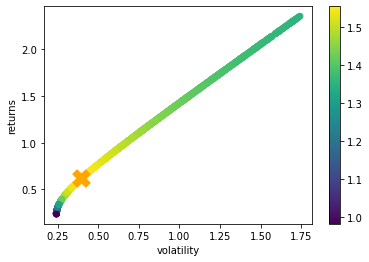

In [31]:
max_sharpe = weighted_results.iloc[weighted_results['sharpe'].idxmax()]

plt.scatter(weighted_results.stdev,weighted_results.returns,c=weighted_results.sharpe)
plt.xlabel('volatility')
plt.ylabel('returns')
plt.colorbar()

plt.scatter(max_sharpe[1],max_sharpe[0],marker="X",color='orange',s=300)

In [32]:
print(max_sharpe)

returns    0.617551
stdev      0.397140
sharpe     1.554994
^IXIC      0.819566
ADA-USD    0.180434
Name: 296, dtype: float64


The optimal weight based on the past 5-years price returns, statistics, modern portfolio theories, mathematics, and previous anaylsis is 86% nasdaq and 14% cardano. This weighted allocation would give an average return of about 53%. 
The volatility is about 33%. You achieve higher returns with exposure to cardano (crypto), but your risk is also mitigated by having a heavier weight in nasdaq (stocks).

In [33]:
msci_weight=max_sharpe[3]
msci_weight

0.819566342189507

In [34]:
cardano_weight=max_sharpe[4]
cardano_weight

0.1804336578104931

In [35]:
msci_weight + cardano_weight

1.0

In [38]:
highest_stock_crypto = df_price[['MSCI_Close', 'ADA-USD_Close']]
highest_stock_crypto.head()

MSCI_Close  ADA-USD_Close
2017-10-02 00:00:00  112.523842       0.025932
2017-10-03 00:00:00  113.995552       0.020816
2017-10-04 00:00:00  115.563446       0.021931
2017-10-05 00:00:00  116.486870       0.021489
2017-10-06 00:00:00  116.660034       0.018539

In [39]:
highest_stock_crypto.columns=pd.MultiIndex.from_tuples(map(lambda x: (x[1], 'close'), highest_stock_crypto.columns))
highest_stock_crypto

S         D
                 close     close
2017-10-02  112.523842  0.025932
2017-10-03  113.995552  0.020816
2017-10-04  115.563446  0.021931
2017-10-05  116.486870  0.021489
2017-10-06  116.660034  0.018539
...                ...       ...
2021-05-25  464.609985  1.555369
2021-05-26  465.100006  1.782702
2021-05-27  464.369995  1.645960
2021-05-28  468.130005  1.511987
2021-06-01  461.970001  1.734753

[918 rows x 2 columns]

In [43]:
from MCForecastTools import MCSimulation

In [45]:
mc_fiveyear = MCSimulation(highest_stock_crypto, [msci_weight,cardano_weight], 500, 252*5)
mc_fiveyear.portfolio_data.head()

S                      D             
                          close daily_return     close daily_return
2017-10-02 00:00:00  112.523842          NaN  0.025932          NaN
2017-10-03 00:00:00  113.995552     0.013079  0.020816    -0.197285
2017-10-04 00:00:00  115.563446     0.013754  0.021931     0.053565
2017-10-05 00:00:00  116.486870     0.007991  0.021489    -0.020154
2017-10-06 00:00:00  116.660034     0.001487  0.018539    -0.137280

In [46]:
mc_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2         3          4           5    \
0      1.000000   1.000000   1.000000  1.000000   1.000000    1.000000   
1      1.011557   1.005124   0.995553  0.999173   1.027865    1.011296   
2      1.027569   1.032126   1.049428  0.997845   1.043589    1.013080   
3      1.020538   1.028750   1.056105  0.998005   1.013134    1.019259   
4      1.025590   1.032081   1.034194  1.015925   1.012140    1.028264   
...         ...        ...        ...       ...        ...         ...   
1256  38.834664  32.335774  35.145808  5.152008  21.653348  119.864495   
1257  37.563110  34.231580  34.474490  5.101554  22.215007  114.685177   
1258  37.243612  33.094195  35.529459  5.023840  21.979594  113.935991   
1259  37.332581  33.413383  36.015009  4.886776  20.489729  110.713087   
1260  37.718923  34.364313  35.937654  4.668148  20.460448  108.206121   

            6          7         8          9    ...        490       491  \
0      1.000000   1.000000  1.000000   1.000000  ...   1.000000  1.000000   
1      1.003813   1.027892  1.000058   1.025692  ...   1.004097  0.976750   
2      1.014493   1.019584  1.017906   1.023288  ...   0.953226  1.003600   
3      1.027788   1.021437  1.048240   1.021234  ...   0.992073  1.016695   
4      1.050271   1.017100  1.058655   1.014236  ...   0.990647  1.021806   
...         ...        ...       ...        ...  ...        ...       ...   
1256  11.029045  21.864727  6.422760  28.720322  ...  54.865249  4.608374   
1257  11.299319  21.577366  6.464502  28.439737  ...  57.140110  4.507398   
1258  11.038694  22.444838  6.626274  27.697901  ...  53.639465  4.556555   
1259  11.205034  22.350171  6.584668  28.086970  ...  54.757343  4.671920   
1260  11.837491  22.385141  6.500896  28.972883  ...  55.404757  4.728457   

           492        493         494        495        496        497  \
0     1.000000   1.000000    1.000000   1.000000   1.000000   1.000000   
1     0.981298   0.997916    1.015136   0.987279   0.974734   1.010897   
2     1.004222   0.970895    1.020603   1.011852   0.920821   0.985765   
3     0.984723   0.975809    0.963921   1.029082   0.911234   1.005999   
4     1.003624   0.961521    0.955629   1.037736   0.909045   1.022178   
...        ...        ...         ...        ...        ...        ...   
1256  5.973178  41.631693  121.355356  23.535815  12.371591  11.226916   
1257  5.812696  40.307664  122.005620  23.176933  12.750570  11.379672   
1258  5.804893  39.297262  118.022350  23.973231  12.805044  11.435443   
1259  5.988519  38.988344  120.301800  23.977400  12.624885  11.375155   
1260  5.976042  39.838943  123.301589  23.877402  12.869068  11.452778   

            498        499  
0      1.000000   1.000000  
1      1.000493   1.007609  
2      1.027044   1.008274  
3      1.036157   1.042022  
4      1.053404   1.024363  
...         ...        ...  
1256  22.090214  39.041800  
1257  22.073757  39.743445  
1258  21.457067  40.700316  
1259  21.168010  41.934953  
1260  22.401086  41.909447  

[1261 rows x 500 columns]

In [47]:
mc_fiveyear.simulated_return.mean(axis=1)

0        1.000000
1        1.002150
2        1.006880
3        1.010386
4        1.014936
          ...    
1256    50.542897
1257    50.801066
1258    51.037100
1259    51.291181
1260    51.469357
Length: 1261, dtype: float64

In [48]:
mc_fiveyear.simulated_return.median(axis=1)

0        1.000000
1        1.000903
2        1.005233
3        1.007656
4        1.015907
          ...    
1256    33.795296
1257    34.031632
1258    33.637563
1259    34.093101
1260    34.234637
Length: 1261, dtype: float64

In [49]:
mc_fiveyear.simulated_return.min(axis=1)

0       1.000000
1       0.917799
2       0.899440
3       0.888218
4       0.864272
          ...   
1256    2.919357
1257    2.722055
1258    2.847031
1259    2.887886
1260    2.844093
Length: 1261, dtype: float64

In [50]:
mc_fiveyear.simulated_return.max(axis=1)

0         1.000000
1         1.108442
2         1.128912
3         1.131805
4         1.186291
           ...    
1256    564.909668
1257    575.534652
1258    565.733131
1259    573.318587
1260    592.669934
Length: 1261, dtype: float64

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

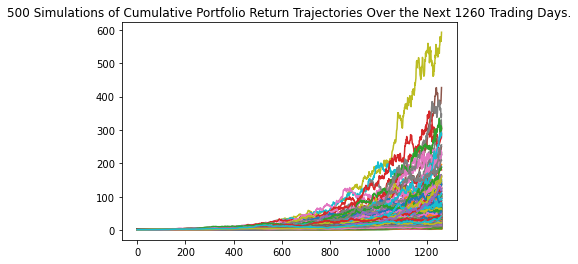

In [51]:
mc_fiveyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

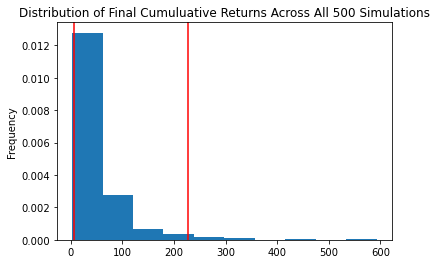

In [52]:
mc_fiveyear.plot_distribution()

In [53]:
mc_fiveyear.summarize_cumulative_return()

count           500.000000
mean             51.469357
std              59.760436
min               2.844093
25%              18.276759
50%              34.234637
75%              61.414249
max             592.669934
95% CI Lower      6.258621
95% CI Upper    226.585456
Name: 1260, dtype: float64

In [55]:
ci_lower = mc_fiveyear.summarize_cumulative_return()[8]
ci_upper = mc_fiveyear.summarize_cumulative_return()[9]
initial_investment = 1000
ci_lower_dollar = ci_lower*initial_investment
ci_upper_dollar = ci_upper*initial_investment

In [56]:
f"there is 95% chance that my intital investment of {initial_investment} is going to to be between {ci_lower_dollar} and {ci_upper_dollar}, holding all else constant and given alpha level of 5%"

'there is 95% chance that my intital investment of 1000 is going to to be between 6258.621317445603 and 226585.45645725963, holding all else constant and given alpha level of 5%'